In [75]:
import numpy as np
import xlrd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [76]:
zomato_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='ISO-8859-1')

zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [77]:
zomato_df.shape

(9551, 21)

In [78]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [79]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [80]:
cc_df=pd.read_excel(r'C:\Users\SSINFOTECH\Internship Flip Robo/Country-Code.xlsx')
cc_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [81]:
zom_df=pd.merge(zomato_df,cc_df,on="Country Code",how="left")
zom_df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [82]:
# Separate numerical and categorical columns
numerical_columns = zom_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = zom_df.select_dtypes(include=['object']).columns

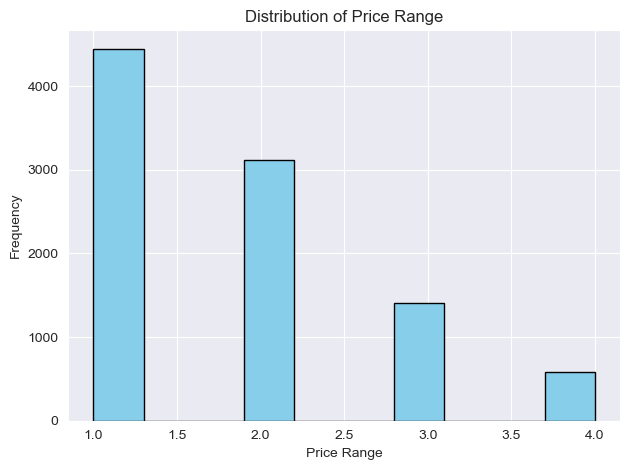

In [83]:
# Distribution of Price Range
plt.hist(zom_df['Price range'], color='skyblue', edgecolor='black')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


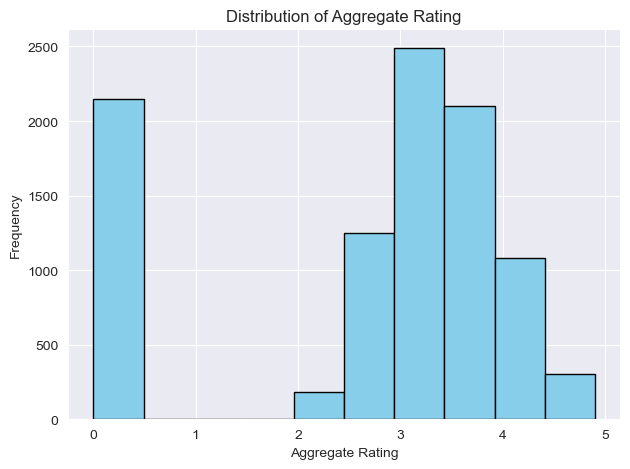

In [84]:
# Distribution of Aggregate Rating
plt.hist(zom_df['Aggregate rating'], color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()   

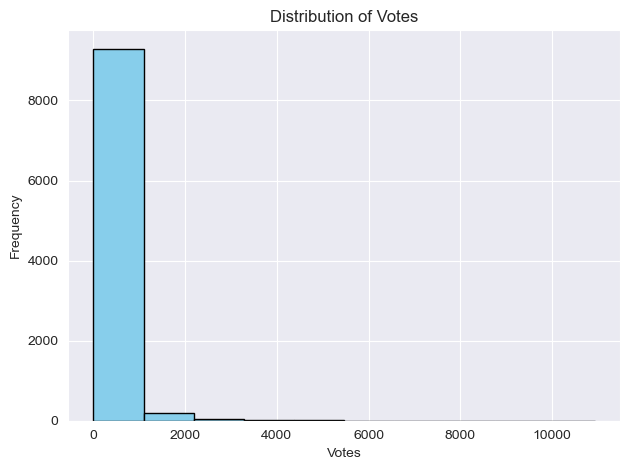

In [85]:
# Distribution of Votes
plt.hist(zom_df['Votes'], color='skyblue', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()     

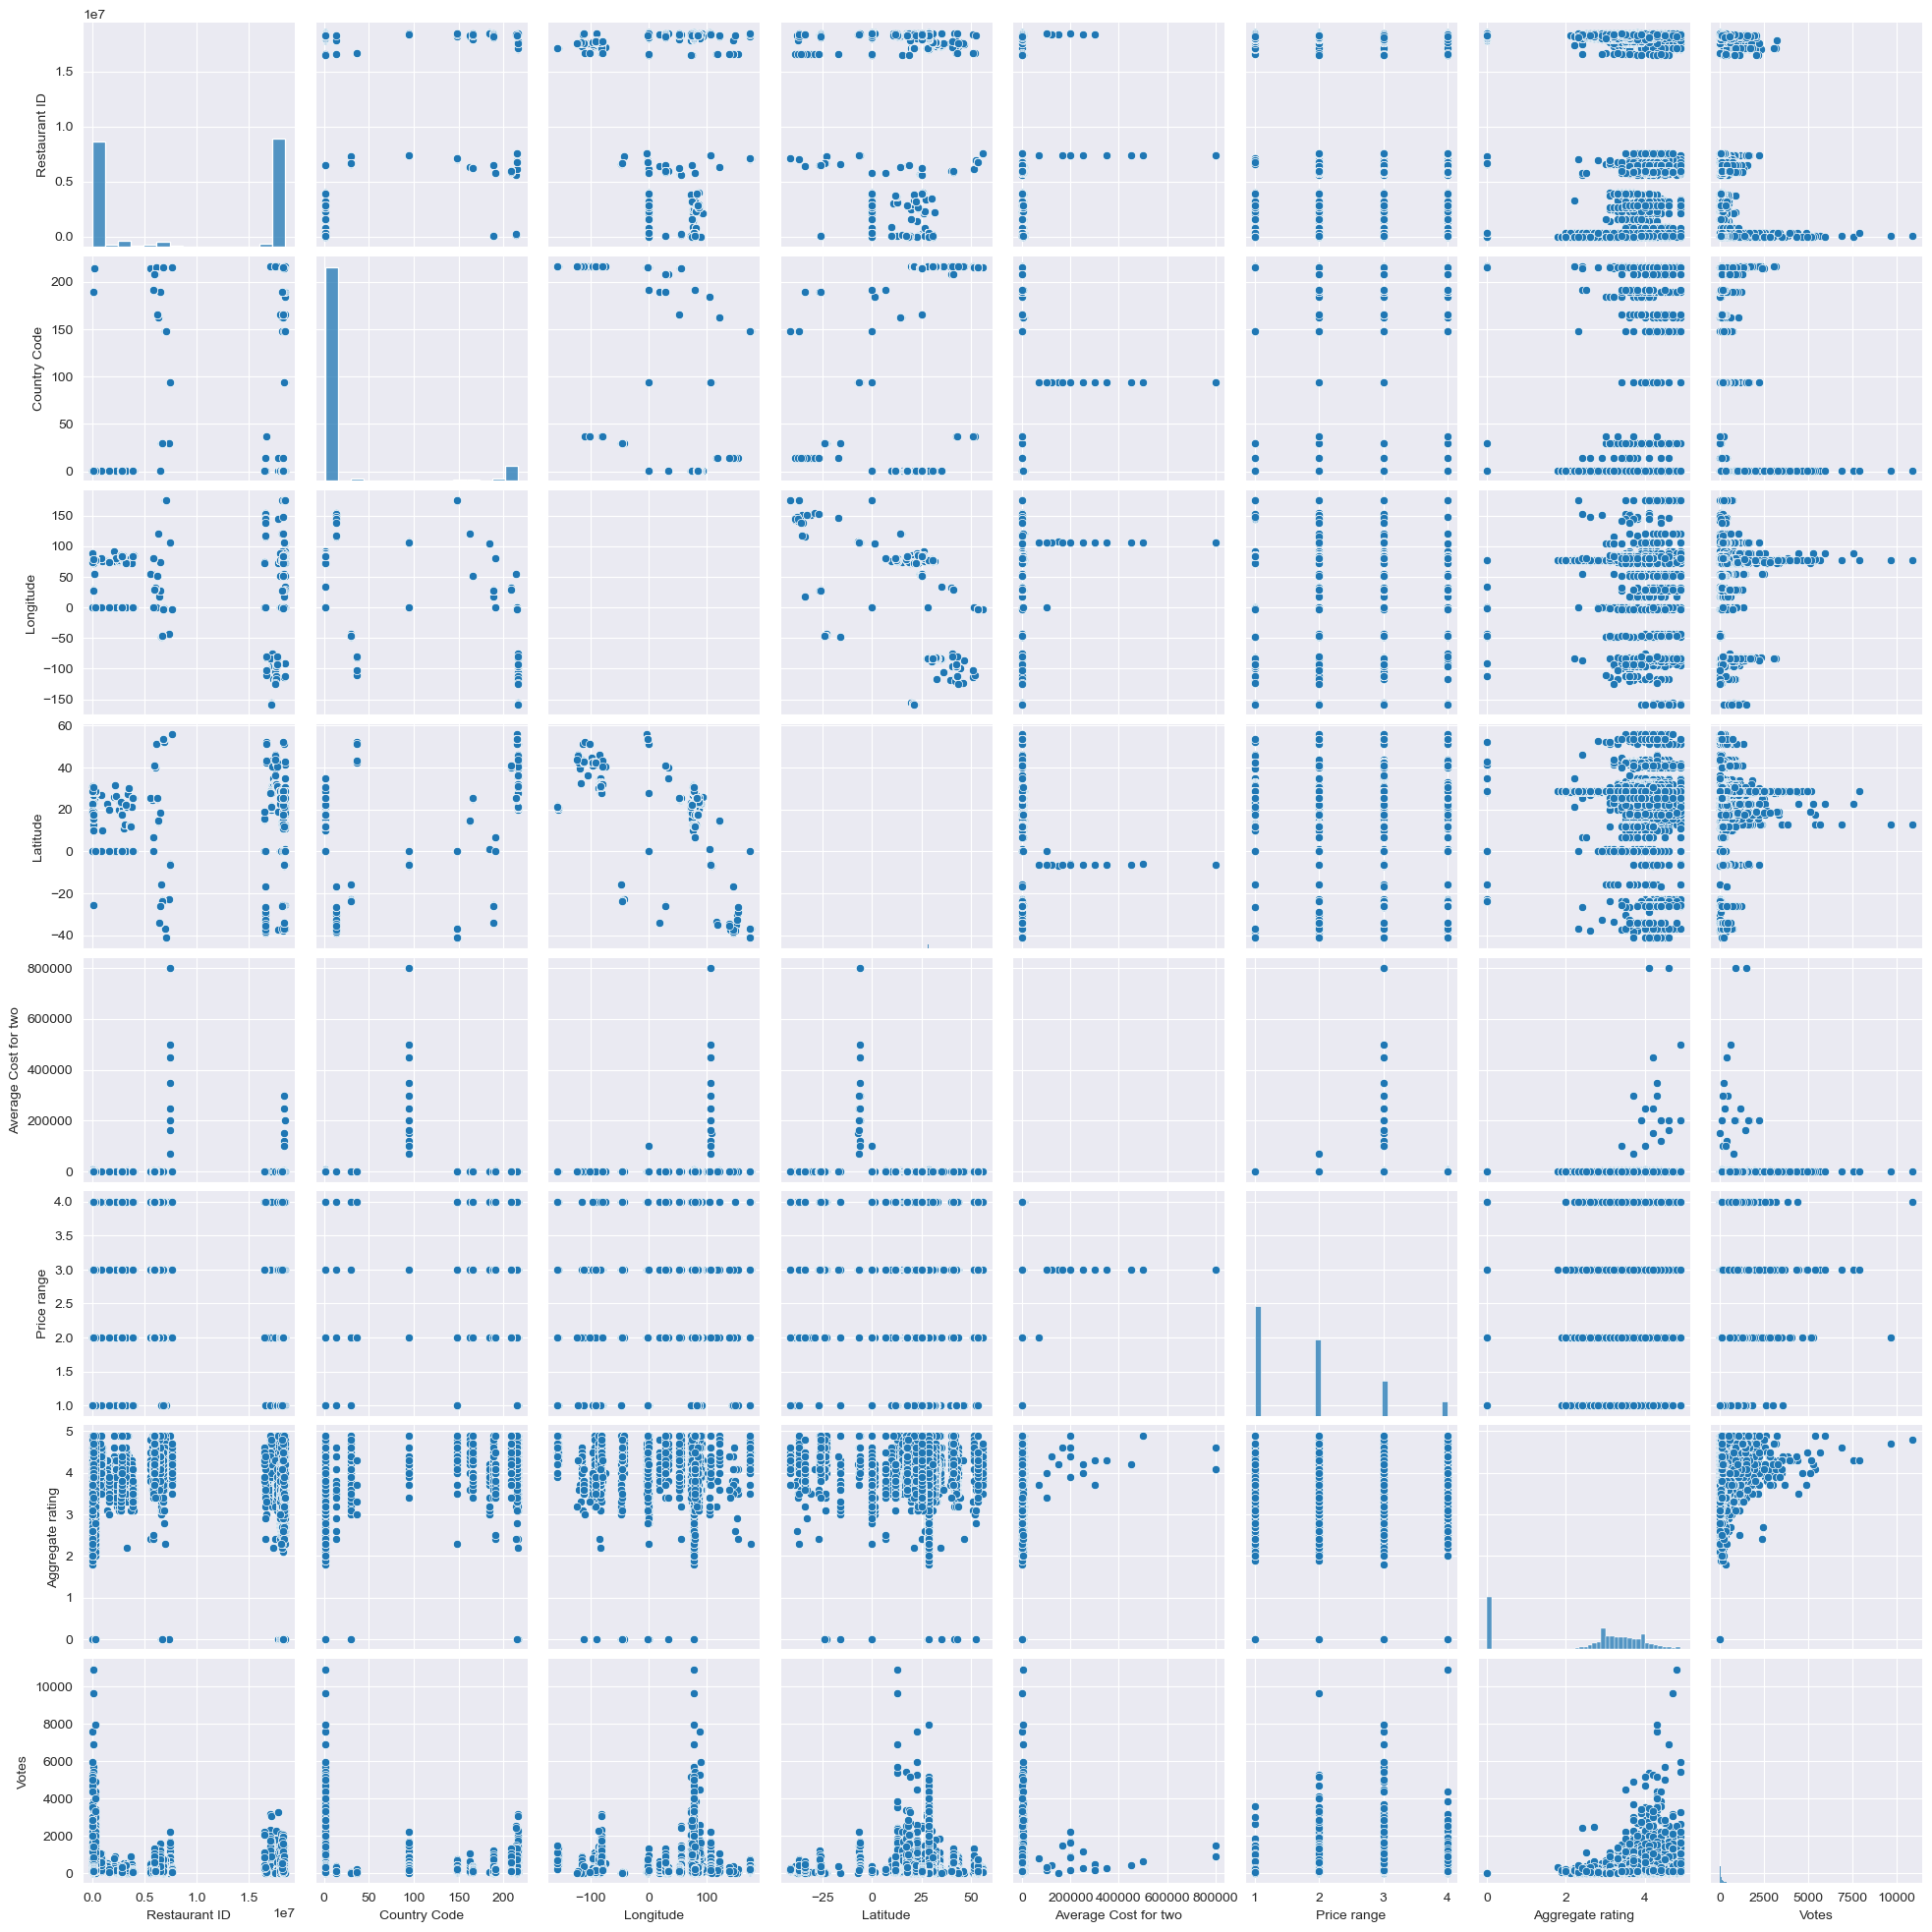

In [88]:
# Pairplot for numerical variables
sns.pairplot(zom_df)
plt.show() 

Text(0.5, 1.0, 'Has Table Booking')

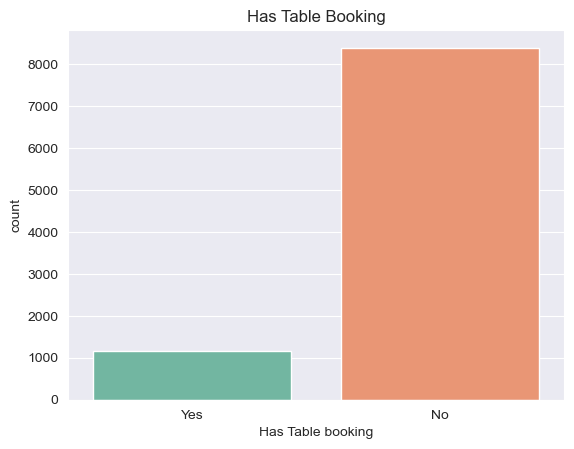

In [92]:
# Count of restaurants with table booking
sns.countplot(data=zom_df, x='Has Table booking', palette='Set2')
plt.title('Has Table Booking')


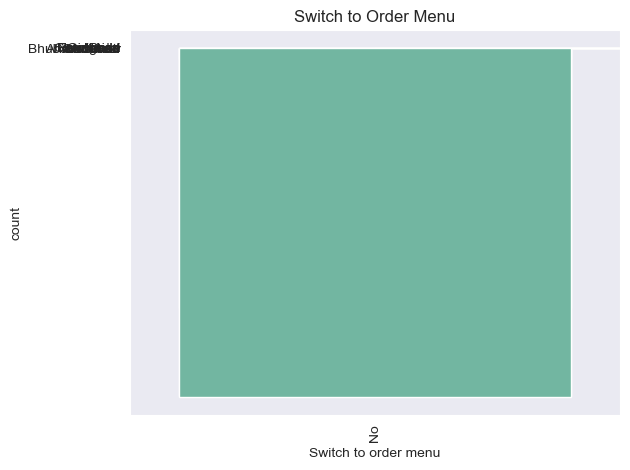

In [87]:
# Count of restaurants with table booking
sns.countplot(data=zom_df, x='Has Table booking', palette='Set2')
plt.title('Has Table Booking')

# Count of restaurants with online delivery
sns.countplot(data=zom_df, x='Has Online delivery', palette='Set2')
plt.title('Has Online Delivery')

# Count of restaurants by rating text
sns.countplot(data=zom_df, x='Rating text', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Text')

# Top 10 cities by restaurant count
sns.countplot(data=zom_df, y='City', palette='Set2', order=zom_df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Restaurant Count')

# Count of restaurants by rating color
sns.countplot(data=zom_df, x='Rating color', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Color')

# Count of restaurants by country
sns.countplot(data=zom_df, x='Country', palette='Set2')
plt.xticks(rotation=90)
plt.title('Country')

# Count of restaurants by currency
sns.countplot(data=zom_df, x='Currency', palette='Set2')
plt.xticks(rotation=90)
plt.title('Currency')

# Count of restaurants delivering now
sns.countplot(data=zom_df, x='Is delivering now', palette='Set2')
plt.xticks(rotation=90)
plt.title('Is Delivering Now')

# Count of restaurants with a switch to order menu
sns.countplot(data=zom_df, x='Switch to order menu', palette='Set2')
plt.xticks(rotation=90)
plt.title('Switch to Order Menu')

plt.tight_layout()
plt.show()     


Text(0.5, 1.0, 'Has Online Delivery')

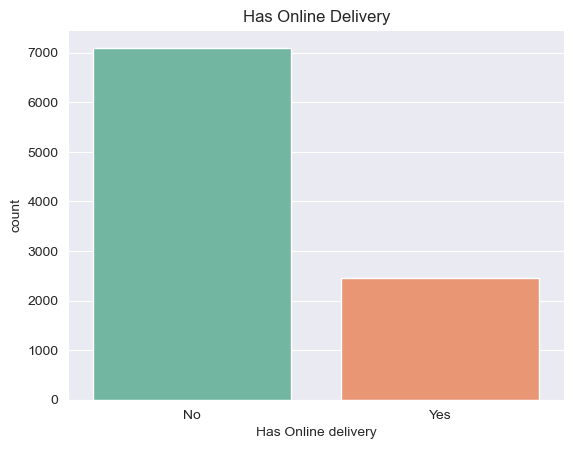

In [93]:
# Count of restaurants with online delivery
sns.countplot(data=zom_df, x='Has Online delivery', palette='Set2')
plt.title('Has Online Delivery')

Text(0.5, 1.0, 'Rating Text')

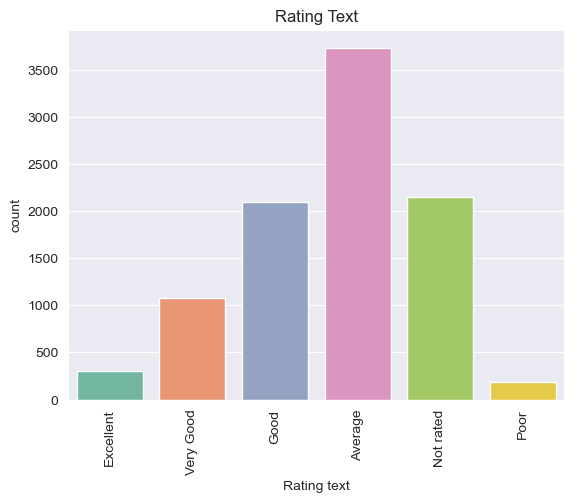

In [94]:
# Count of restaurants by rating text
sns.countplot(data=zom_df, x='Rating text', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Text')

Text(0.5, 1.0, 'Top 10 Cities by Restaurant Count')

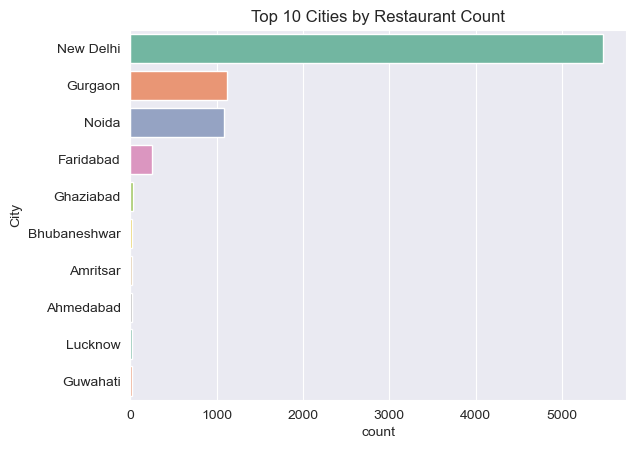

In [95]:
# Top 10 cities by restaurant count
sns.countplot(data=zom_df, y='City', palette='Set2', order=zom_df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Restaurant Count')



Text(0.5, 1.0, 'Rating Color')

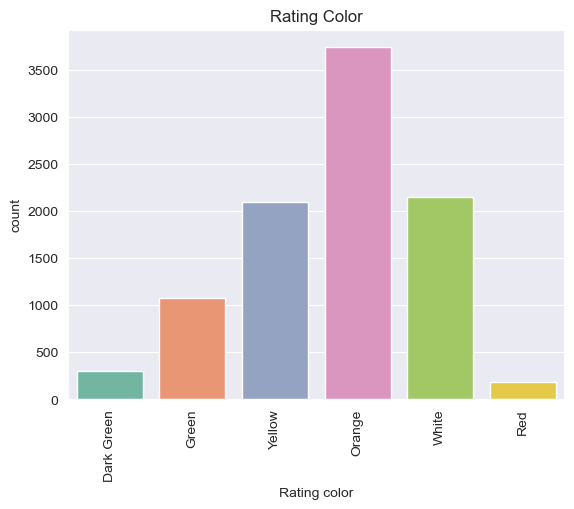

In [96]:
# Count of restaurants by rating color
sns.countplot(data=zom_df, x='Rating color', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Color')



Text(0.5, 1.0, 'Country')

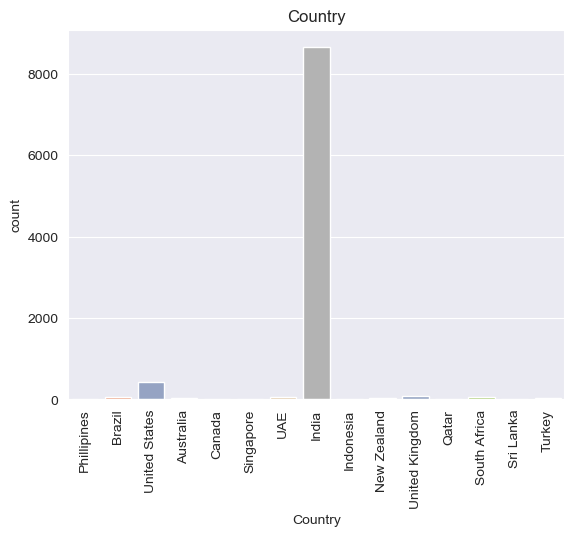

In [97]:
# Count of restaurants by country
sns.countplot(data=zom_df, x='Country', palette='Set2')
plt.xticks(rotation=90)
plt.title('Country')



Text(0.5, 1.0, 'Currency')

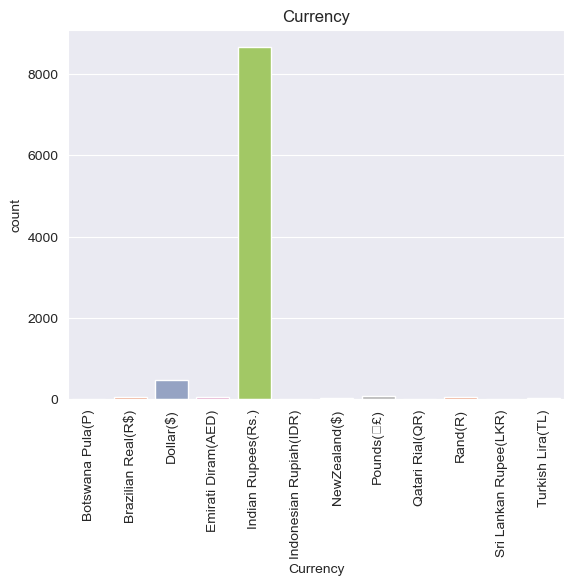

In [98]:
# Count of restaurants by currency
sns.countplot(data=zom_df, x='Currency', palette='Set2')
plt.xticks(rotation=90)
plt.title('Currency')



Text(0.5, 1.0, 'Is Delivering Now')

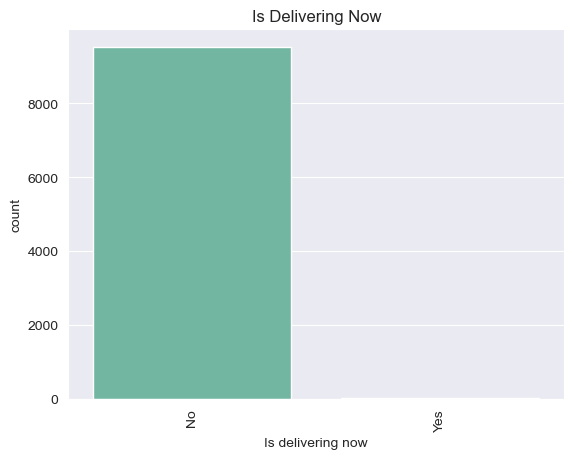

In [99]:
# Count of restaurants delivering now
sns.countplot(data=zom_df, x='Is delivering now', palette='Set2')
plt.xticks(rotation=90)
plt.title('Is Delivering Now')

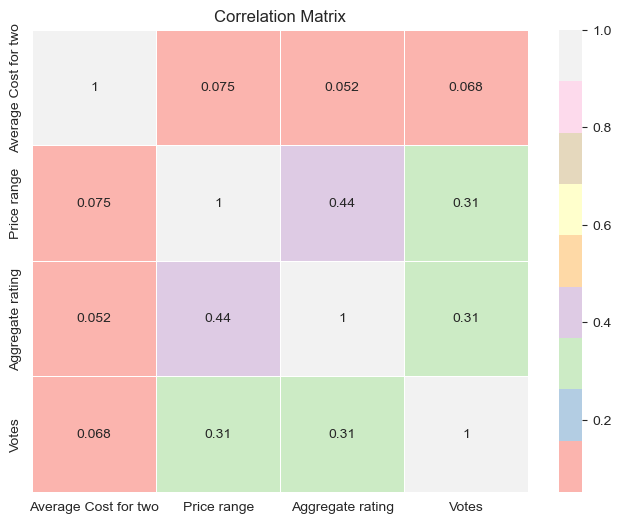

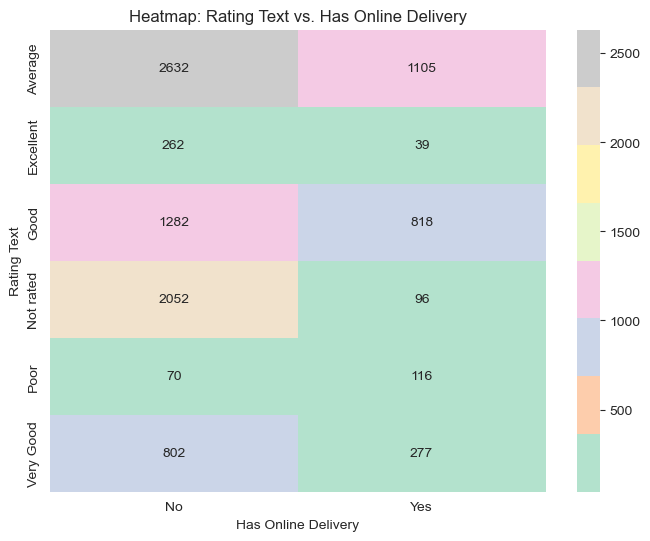

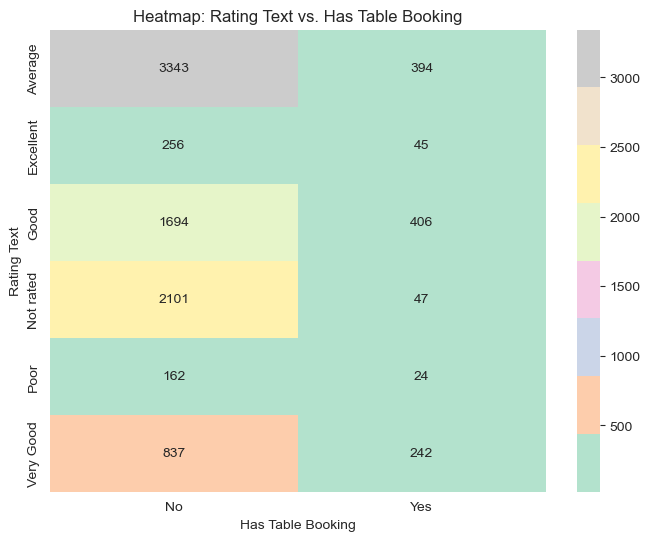

In [100]:
# Correlation matrix
correlation_matrix = zom_df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Heatmap: Rating Text vs. Has Online Delivery
crosstab = pd.crosstab(zom_df['Rating text'], zom_df['Has Online delivery'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Rating Text')
plt.show()

# Heatmap: Rating Text vs. Has Table Booking
crosstab2 = pd.crosstab(zom_df['Rating text'], zom_df['Has Table booking'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab2, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Rating Text')
plt.show()    

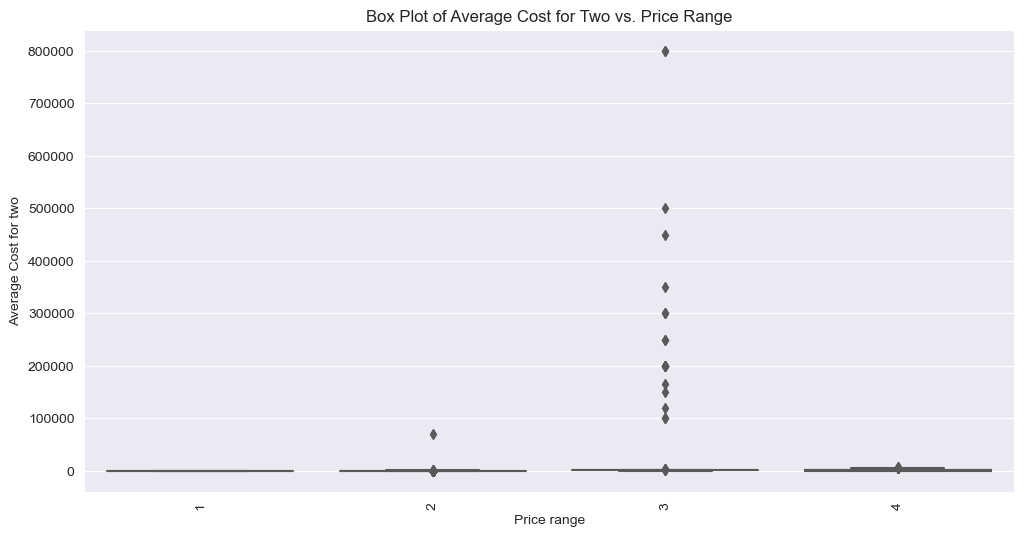

In [47]:
# Box Plot of Average Cost for Two vs. Price Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=zom_df, x='Price range', y='Average Cost for two', palette='Set2')
plt.title('Box Plot of Average Cost for Two vs. Price Range')
plt.xticks(rotation=90)
plt.show() 

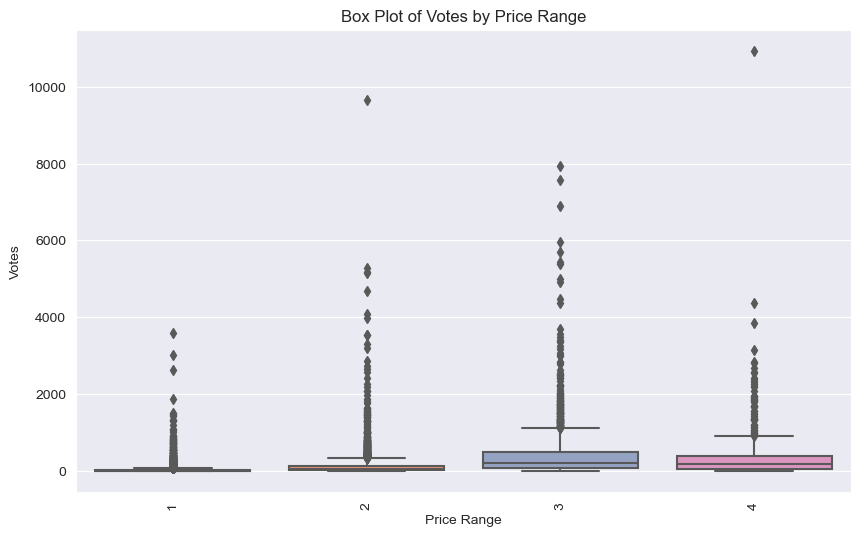

In [48]:
# Box Plot of Votes by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=zom_df, x='Price range', y='Votes', palette='Set2')
plt.title('Box Plot of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show() 

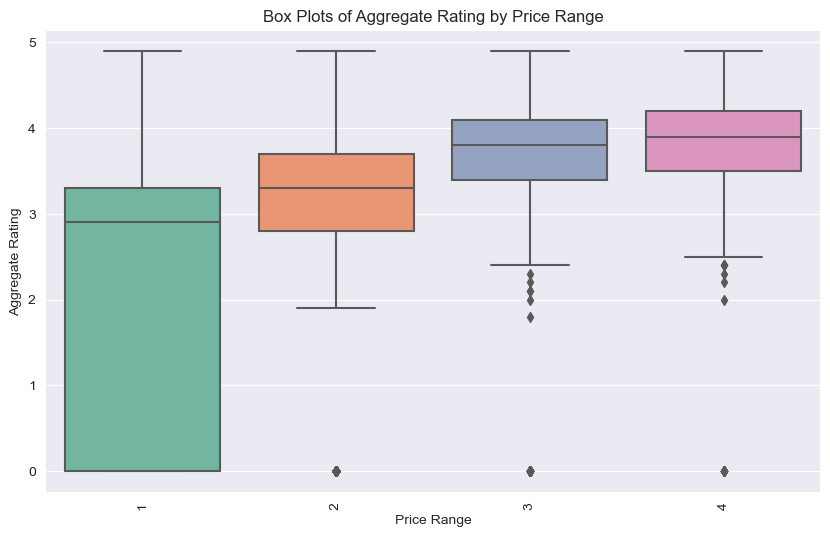

In [49]:
# Box Plots of Aggregate Rating by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=zom_df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show() 

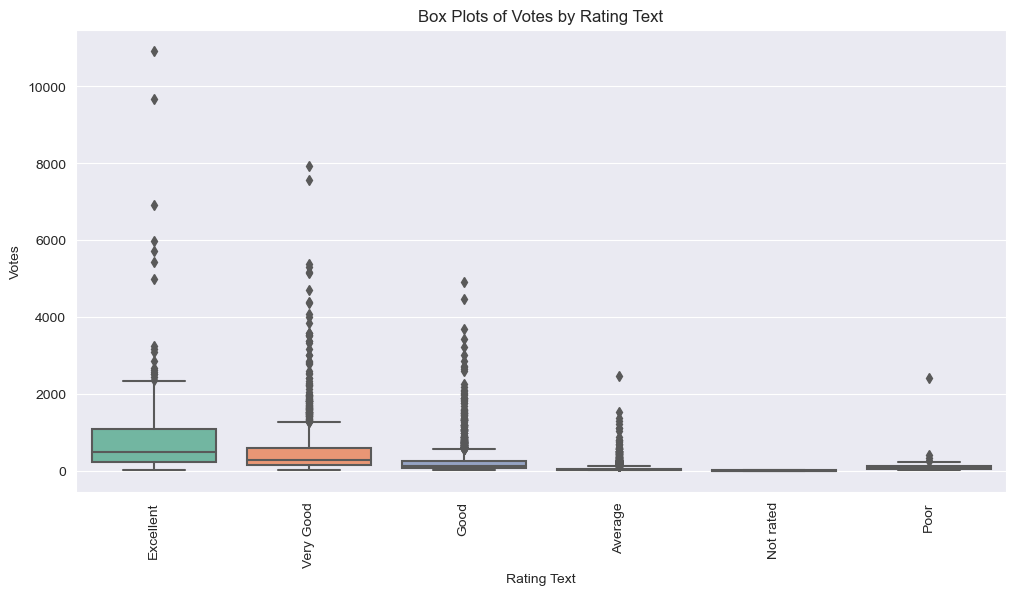

In [51]:
# Box Plots of Votes by Rating Text
plt.figure(figsize=(12, 6))
sns.boxplot(data=zom_df, x='Rating text', y='Votes', palette='Set2')
plt.title('Box Plots of Votes by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()  

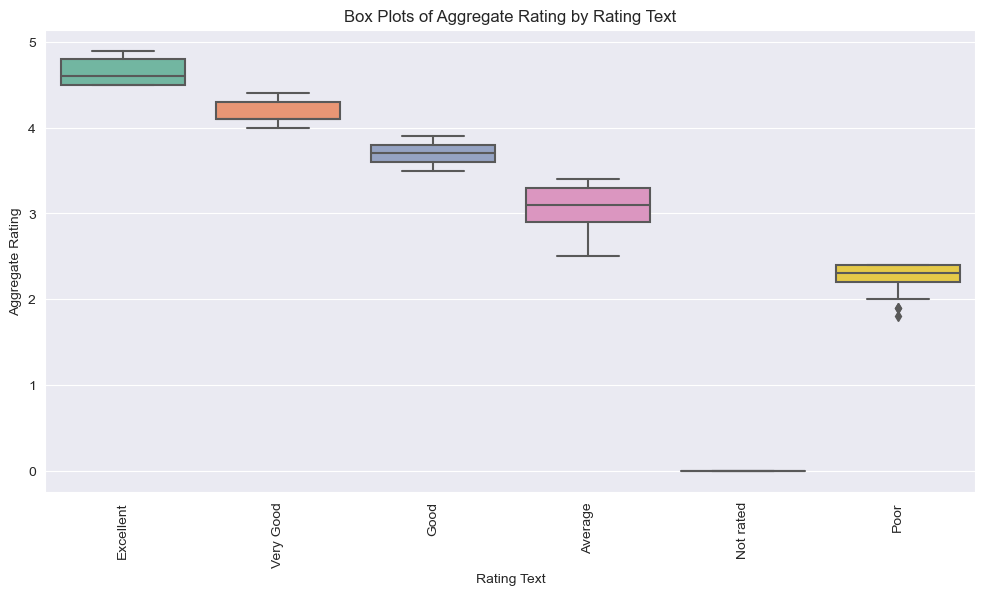

In [52]:
# Box Plots of Aggregate Rating by Rating Text
plt.figure(figsize=(12, 6))
sns.boxplot(data=zom_df, x='Rating text', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

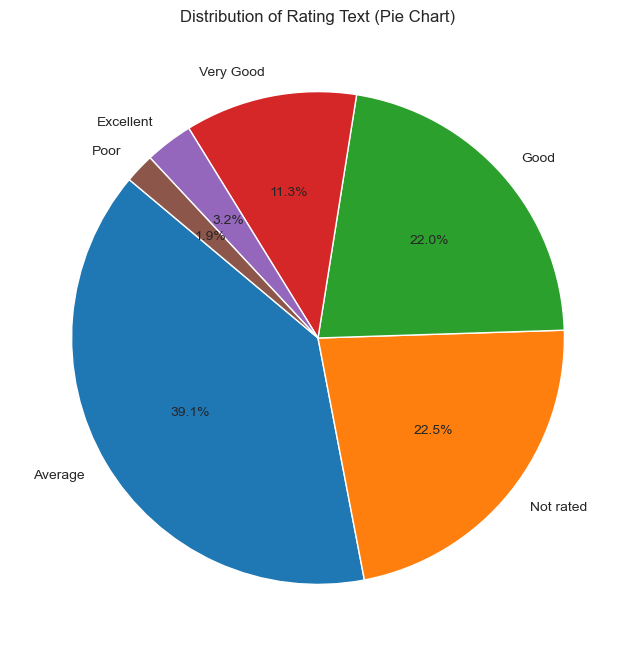

In [53]:
# Distribution of Rating Text (Pie Chart)
rating_counts = zom_df['Rating text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating Text (Pie Chart)')
plt.show()   

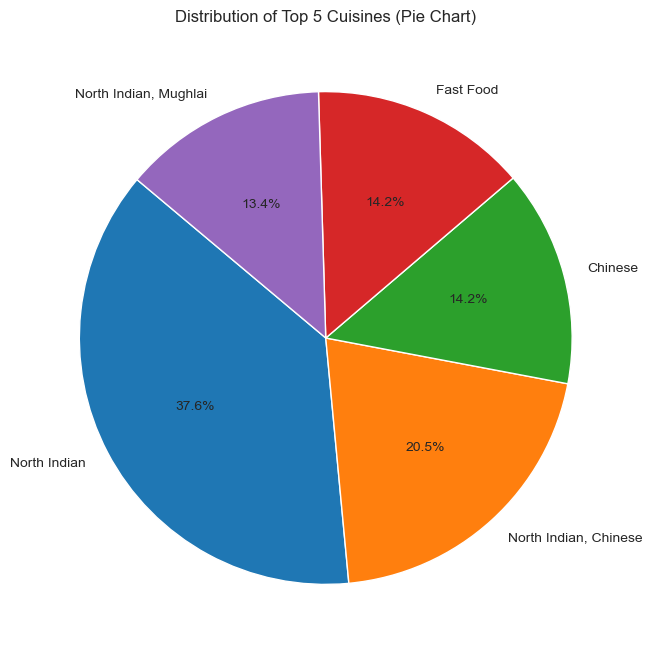

In [54]:
# Distribution of Top 5 Cuisines (Pie Chart)
top_cuisines = zom_df['Cuisines'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Cuisines (Pie Chart)')
plt.show()    

In [101]:
#Encoding the Data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
zom_df['Has Table booking'] = label_encoder.fit_transform(zom_df['Has Table booking'])
zom_df['Has Online delivery'] = label_encoder.fit_transform(zom_df['Has Online delivery'])
zom_df['Is delivering now'] = label_encoder.fit_transform(zom_df['Is delivering now'])
zom_df['Switch to order menu'] = label_encoder.fit_transform(zom_df['Switch to order menu'])
zom_df['Cuisines'] = label_encoder.fit_transform(zom_df['Cuisines'])
zom_df['City'] = label_encoder.fit_transform(zom_df['City'])
zom_df['Rating text'] = label_encoder.fit_transform(zom_df['Rating text'])
zom_df['Rating color'] = label_encoder.fit_transform(zom_df['Rating color'])
zom_df['Locality'] = label_encoder.fit_transform(zom_df['Locality'])
zom_df['Locality Verbose'] = label_encoder.fit_transform(zom_df['Locality Verbose'])
zom_df['Price range'] = label_encoder.fit_transform(zom_df['Price range']) 

In [102]:
# Drop unnecessary columns
zom_df = zom_df.drop(['Restaurant Name', 'Address', 'Currency', 'Restaurant ID', 'Country'], axis=1)

In [103]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split

X_cost = zom_df.drop(['Average Cost for two'], axis=1)
y_cost = zom_df['Average Cost for two']

X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42) 

In [104]:
#Scaling the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cost_train_scaled = scaler.fit_transform(X_cost_train)
X_cost_test_scaled = scaler.transform(X_cost_test)

In [59]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_linear = linear_reg_model.predict(X_cost_test_scaled)

mse_linear = mean_squared_error(y_cost_test, y_cost_pred_linear)
mae_linear = mean_absolute_error(y_cost_test, y_cost_pred_linear)
r2_linear = r2_score(y_cost_test, y_cost_pred_linear)

cv_scores_linear = cross_val_score(linear_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"R-squared (R2) Score: {r2_linear:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_linear):.2f}") 

Linear Regression Model:
Mean Squared Error (MSE): 372549196.50
Mean Absolute Error (MAE): 1889.01
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14426.53


In [60]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg_model = Ridge()
ridge_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_ridge = ridge_reg_model.predict(X_cost_test_scaled)

mse_ridge = mean_squared_error(y_cost_test, y_cost_pred_ridge)
mae_ridge = mean_absolute_error(y_cost_test, y_cost_pred_ridge)
r2_ridge = r2_score(y_cost_test, y_cost_pred_ridge)

cv_scores_ridge = cross_val_score(ridge_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_ridge = np.sqrt(-cv_scores_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_ridge):.2f}") 

Ridge Regression Model:
Mean Squared Error (MSE): 372531332.38
Mean Absolute Error (MAE): 1885.52
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14425.62


In [62]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_rf = rf_reg_model.predict(X_cost_test_scaled)

mse_rf = mean_squared_error(y_cost_test, y_cost_pred_rf)
mae_rf = mean_absolute_error(y_cost_test, y_cost_pred_rf)
r2_rf = r2_score(y_cost_test, y_cost_pred_rf)

cv_scores_rf = cross_val_score(rf_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_rf):.2f}")  

Random Forest Regressor Model:
Mean Squared Error (MSE): 202299640.99
Mean Absolute Error (MAE): 577.47
R-squared (R2) Score: 0.47
Cross-Validated RMSE: 8829.88


In [63]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_reg_model = GradientBoostingRegressor()
gb_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_gb = gb_reg_model.predict(X_cost_test_scaled)

mse_gb = mean_squared_error(y_cost_test, y_cost_pred_gb)
mae_gb = mean_absolute_error(y_cost_test, y_cost_pred_gb)
r2_gb = r2_score(y_cost_test, y_cost_pred_gb)

cv_scores_gb = cross_val_score(gb_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_gb = np.sqrt(-cv_scores_gb)

print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_gb):.2f}") 

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 202088560.62
Mean Absolute Error (MAE): 550.85
R-squared (R2) Score: 0.47
Cross-Validated RMSE: 11604.99


In [64]:
#Random Forest Regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

rf_reg_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_cost_train_scaled, y_cost_train)

best_params = grid_search.best_params_

print("Best Hyperparameters for rf_reg_model:", best_params)

best_rf_reg_model = grid_search.best_estimator_

y_cost_pred_best_rf = best_rf_reg_model.predict(X_cost_test_scaled)

mse_rf_best = mean_squared_error(y_cost_test, y_cost_pred_best_rf)
mae_rf_best = mean_absolute_error(y_cost_test, y_cost_pred_best_rf)
r2_rf_best = r2_score(y_cost_test, y_cost_pred_best_rf)

print("Best RandomForestRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf_best:.2f}")
print(f"R-squared (R2) Score: {r2_rf_best:.2f}")

Best Hyperparameters for rf_reg_model: {'max_depth': 3, 'n_estimators': 100}
Best RandomForestRegressor Model:
Mean Squared Error (MSE): 176221863.28
Mean Absolute Error (MAE): 636.44
R-squared (R2) Score: 0.54


In [65]:
#Sample Data for Prediction - Average cost for two
sample_data1 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Price range': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

sample_data1_scaled = scaler.transform(sample_data1)

# Predictions
sample_pred1 = best_rf_reg_model.predict(sample_data1_scaled)

print("Predicted Average Cost for Two (Sample Data 1):", sample_pred1[0])

Predicted Average Cost for Two (Sample Data 1): 950.3821316080673


# Predicting Price Range

In [105]:
#Splitting the Dataset
X_price_range = zom_df.drop(['Price range'], axis=1)
y_price_range = zom_df['Price range']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price_range, y_price_range, test_size=0.2, random_state=42)

In [106]:
#Encoding the Data
# Encode categorical columns
X_price_train_encoded = pd.get_dummies(X_price_train, columns=['Country Code', 'City', 'Rating text', 'Rating color'])

X_price_test_encoded = pd.get_dummies(X_price_test, columns=['Country Code', 'City', 'Rating text', 'Rating color'])

In [109]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_logistic = logistic_reg_model.predict(X_price_test_encoded)

accuracy_logistic = accuracy_score(y_price_test, y_price_pred_logistic)
classification_rep_logistic = classification_report(y_price_test, y_price_pred_logistic)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:\n", classification_rep_logistic)

ValueError: X has 144 features, but LogisticRegression is expecting 166 features as input.

In [69]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_class_model = RandomForestClassifier()
rf_class_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_rf_class = rf_class_model.predict(X_price_test_encoded)

accuracy_rf_class = accuracy_score(y_price_test, y_price_pred_rf_class)
classification_rep_rf_class = classification_report(y_price_test, y_price_pred_rf_class)

print("Random Forest Classifier Model:")
print(f"Accuracy: {accuracy_rf_class:.2f}")
print("Classification Report:\n", classification_rep_rf_class) 

NameError: name 'X_price_train_encoded' is not defined

In [68]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_class_model = GradientBoostingClassifier()
gb_class_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_gb_class = gb_class_model.predict(X_price_test_encoded)

accuracy_gb_class = accuracy_score(y_price_test, y_price_pred_gb_class)
classification_rep_gb_class = classification_report(y_price_test, y_price_pred_gb_class)

print("Gradient Boosting Classifier Model:")
print(f"Accuracy: {accuracy_gb_class:.2f}")
print("Classification Report:\n", classification_rep_gb_class) 

NameError: name 'X_price_train_encoded' is not defined

In [70]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(X_range_train, y_range_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_range_train, y_range_train)

y_pred2 = best_rf_classifier.predict(X_range_test)

accuracy = accuracy_score(y_range_test, y_pred2)
conf_matrix = confusion_matrix(y_range_test, y_pred2)
class_report = classification_report(y_range_test, y_pred2)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report) 

In [ ]:
#Checking Model Predictions with Sample Data
sample_data2 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Average Cost for two': [1340],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

# Load the trained Random Forest Classifier model
model2 = best_rf_classifier

# Define a filename for the model
model_filename2 = 'model_filename2.pkl'

# Save the model using joblib
joblib.dump(model2, model_filename2)

# Load the model for making predictions
loaded_model2 = joblib.load(model_filename2)

# Predict the price range using the loaded model
predicted_price_range = loaded_model2.predict(sample_data2)

print(f"Predicted Price Range: {predicted_price_range[0]}")